# Customer Segmentation using KMeans Clustering

In this project, we performed an in-depth customer segmentation analysis using the popular `Mall Customers` dataset.

The goal was to apply **unsupervised machine learning techniques** to group customers into distinct clusters based on their annual income and spending behavior.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

sns.set(style='whitegrid')

 ## Data Exploration & Preprocessing

The analysis started with exploratory data analysis (EDA), including distribution plots and pairwise visualizations using pairplot to understand feature relationships and detect potential patterns.


In [67]:
df = pd.read_csv('data/Mall_Customers.csv')

In [68]:
print("First  rows of the data:")
display(df.head())

First  rows of the data:


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [69]:
print("Dataset info:")
df.info()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [70]:
print("Summary statistics:")
display(df.describe())

Summary statistics:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


 We will focus on three features for clustering:
- Age
- Annual Income (k$)
- Spending Score (1-100)

In [71]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


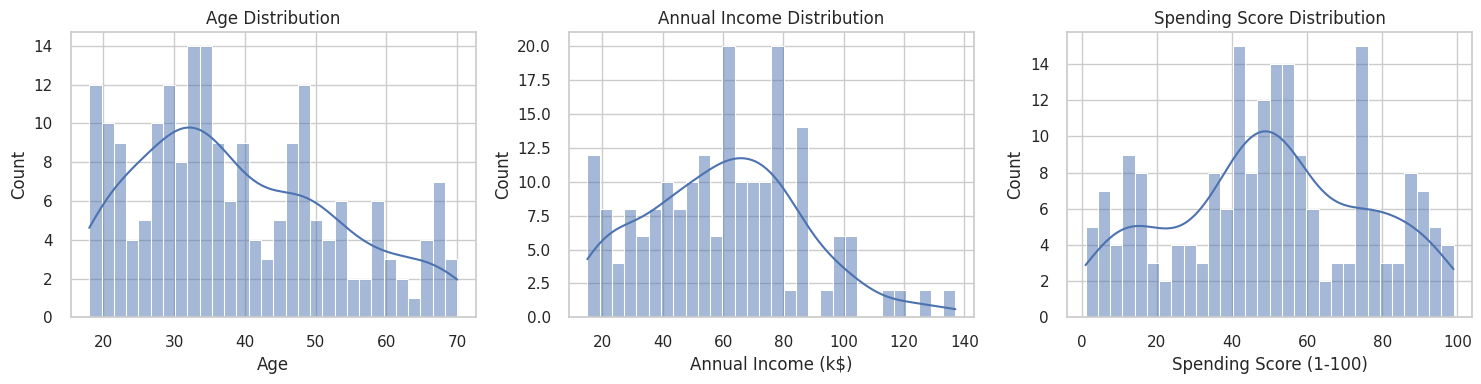

In [72]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], bins=30, kde=True)
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], bins=30, kde=True)
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

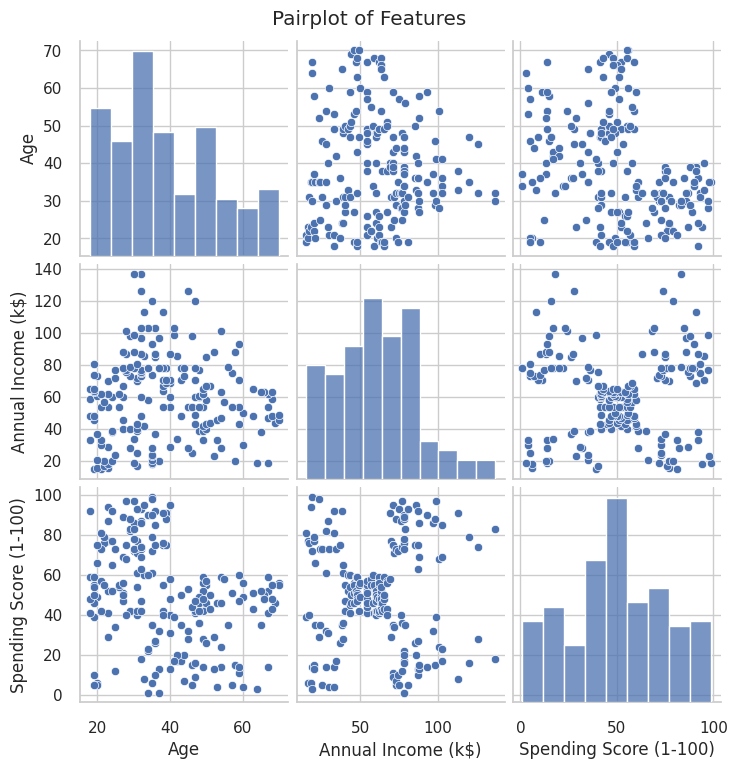

In [73]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

## Data Preprocessing: Scaling Features

Clustering algorithms are sensitive to feature scales.

We scale the features using `StandardScaler` (mean=0, std=1).

In [74]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features scaled: mean (approx) =", X_scaled.mean(axis=0), ", std (approx) =", X_scaled.std(axis=0))

Features scaled: mean (approx) = [-1.02140518e-16 -2.13162821e-16 -1.46549439e-16] , std (approx) = [1. 1. 1.]


## KMeans

**KMeans** is one of the most widely used clustering algorithms due to its simplicity and efficiency. It partitions the data into a predefined number of clusters by minimizing the sum of squared distances between data points and their respective cluster centroids. KMeans assumes that clusters are roughly spherical and similar in size, which makes it well-suited for many practical scenarios where these conditions hold.

## Determining Optimal Number of Clusters (k)

To determine the optimal number of clusters (k) for KMeans, we used both:

- **Elbow Method** via Yellowbrick's KElbowVisualizer - which suggested k=4

- **Silhouette Score Analysis** - which suggested k=6

While the two methods produced different results, a detailed visual analysis using PCA projections revealed that k=4 offered more meaningful and visually distinct groupings, making it the final choice for modeling.

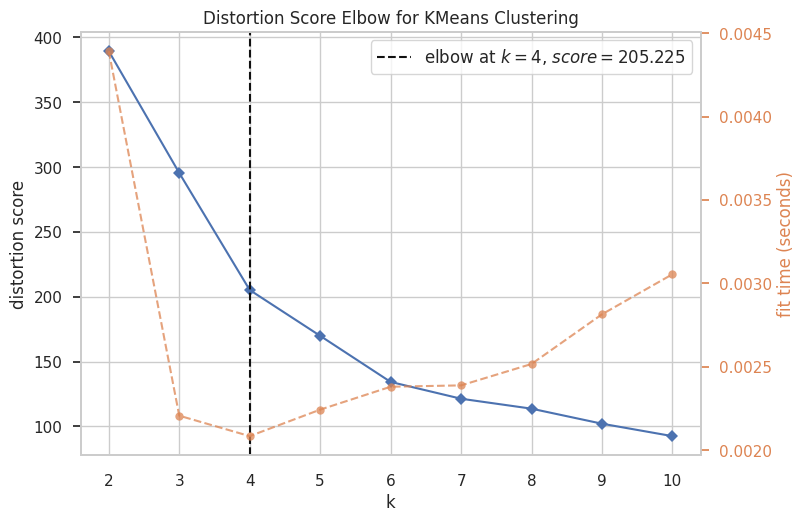

Optimal k: 4


In [75]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 11))
visualizer.fit(X_scaled)
visualizer.show()

print("Optimal k:", visualizer.elbow_value_)

In [76]:
sil_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

best_k = K[np.argmax(sil_scores)]
print("Best k according to Silhouette Score:", best_k)

Best k according to Silhouette Score: 6


 ## Visualizing Clusters Using PCA for Selected k

In [77]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [78]:
def plot_clusters(k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    plt.figure(figsize=(7, 5))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(f'KMeans Clustering (k={k}) - PCA Projection')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True)
    plt.show()

Cluster visualization for k=4


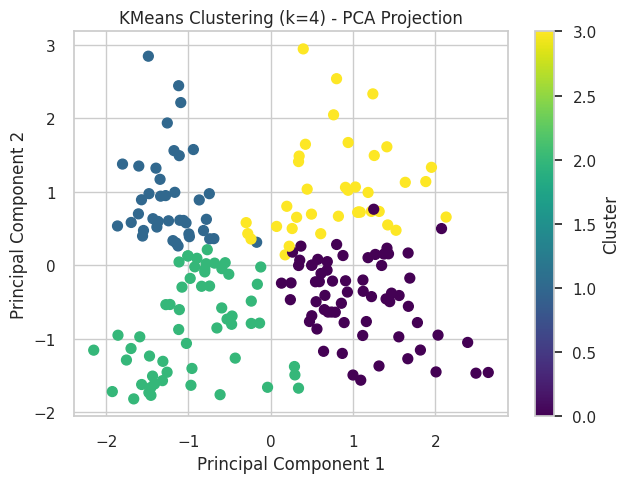

In [79]:
print("Cluster visualization for k=4")
plot_clusters(4)

Cluster visualization for k=6


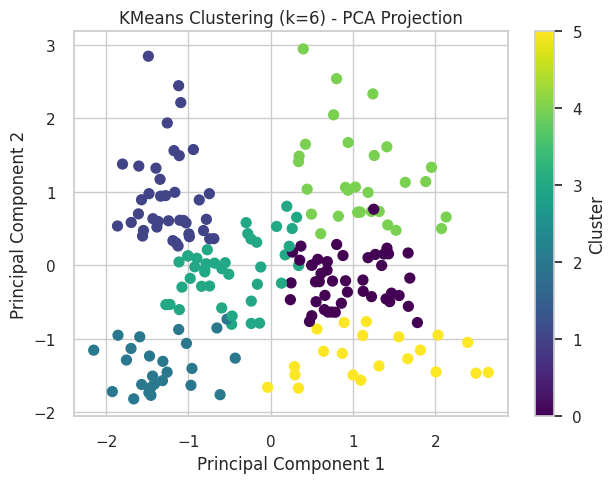

In [80]:
print("Cluster visualization for k=6")
plot_clusters(6)

## Final Clustering & Insights

With k=4, the final KMeans model was trained and used to assign each customer to a cluster.

These cluster assignments were added back to the dataset and analyzed to derive insights into customer types. For example:

 - One cluster represented **high-income, high-spending customers**

 - Another included **low-income, low-spending individuals**

This kind of segmentation could be directly used for targeted marketing, customer relationship strategies, and product recommendations.

In [81]:
final_kmeans = KMeans(n_clusters=4, random_state=42)
labels_final = final_kmeans.fit_predict(X_scaled)

In [82]:
df['Cluster'] = labels_final

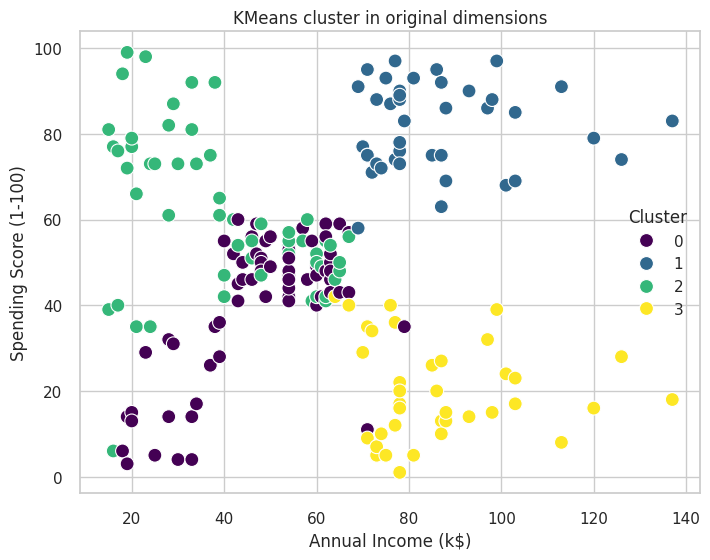

In [83]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title("KMeans cluster in original dimensions")
plt.show()


In [85]:
silhouette = silhouette_score(X_scaled, labels_final)

print(f"Silhouette Score: {silhouette:.3f}")

Silhouette Score: 0.404


### Conclusion

The final KMeans clustering model with 4 clusters provided a practical and interpretable segmentation of customers based on their income and spending habits. Although the achieved Silhouette Score of 0.404 indicates a moderate level of cluster separation, visual analysis and domain understanding support the validity of the clusters.

The segmentation highlights key behavioral patterns, such as high-income/high-spending and low-income/low-spending customers, providing valuable insights for targeted marketing and customer retention strategies.

While the clustering shows promise, the moderate silhouette score also points to some overlap between clusters. To refine the clusters further, potential improvements could include:

- Testing alternative clustering algorithms (e.g., DBSCAN or hierarchical clustering).

- Incorporating additional behavioral or demographic features.

Overall, this project demonstrates the potential of unsupervised learning in deriving actionable insights from customer data.